In [61]:
import pandas as pd
import numpy as np
import re
import string
from bs4 import BeautifulSoup
from ast import literal_eval
import heapq
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [2]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

In [3]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [4]:
import tensorflow as tf
tf.version.VERSION

'2.4.1'

In [5]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [6]:
CF  = pd.read_csv('CareersFutureCleaned.csv')

In [7]:
CF

,Unnamed: 0,job_id,Job Description,Job Other Requirements,Skills,Industry,Job Title,Job Experience Required (years),Job Monthly Min Sal,Job Monthly Max Sal,Post Date
0,0,22f1bcc8d20911b85db5387f5038ff8a,The Senior Restaurant Supervisor will be resp...,NaN,"['Claims Handling', 'Customer Relations', 'Emp...","['F&B', 'General Management']",Senior Restaurant Supervisor,4,4500,7000,15/09/2020
1,1,698c038b83040c2c474bc41c6ea3d0cb,ECHOL TECH – A Team of Technology Architect a...,NaN,"['Artificial Intelligence', 'Big Data', 'C++',...",['Information Technology'],Data Scientist and DevSecOps Developer,3,5000,7000,15/09/2020
2,2,b43fe59893b7348a94fac355d66a4391,Position Office Admin Support Administration ...,NaN,"['Data', 'MS Office', 'MS Office Suite', 'MS O...",['Education and Training'],Admin Support (School),1,1100,1500,15/09/2020
3,3,8a6748454b0adee2644c207a80a03fc6,Lead engineer for Techical Requirements Analy...,NaN,"['Analysis', 'Java', 'Java Application Develop...",['Information Technology'],Technical Lead/ Senior Consultant/ Senior Tech...,5,5000,9000,15/09/2020
4,4,f121bbb503160bfc4faae799b70dee8d,We are seeking individuals that are driven dy...,NaN,"['Contract Recruitment', 'Coordination', 'Exec...","['Human Resources', 'Sales / Retail']",Senior Recruitment Consultant,2,2800,4600,15/09/2020
...,...,...,...,...,...,...,...,...,...,...,...
39495,39495,5b221d4e745cc8429cf2469f0f484154,The People Organization Group POG is the GovT...,NaN,"['Agile Methodologies', 'Algorithms', 'Artific...","['Information Technology', 'Public / Civil Ser...",Data Scientist (Human Capital),0,5000,8000,27/03/2020
39496,39496,7ceef062786a69a3e8ee2b04d5fa80bb,GovTech builds key digital platforms and infr...,NaN,"['Business Analysis', 'Business Intelligence',...","['Information Technology', 'Public / Civil Ser...","Engagement Manager, eKYC",0,5000,8000,27/03/2020
39497,39497,1d72acd8196ffbab05f6375442ad8322,Imagine citizens having a common and secure d...,NaN,"['Business Analysis', 'Business Development', ...","['Information Technology', 'Public / Civil Ser...",Security Operations Manager/Lead (National Dig...,0,6000,9000,27/03/2020
39498,39498,f2a6a6acc9f0bdec2e88359439556bab,As a Data Engineer in GovTech’s Data Science ...,NaN,"['Agile Methodologies', 'Cloud Computing', 'Di...","['Engineering', 'Public / Civil Service']",Data Engineering (Visualisation),0,5000,9000,27/03/2020


In [8]:
CF['clean_jd'] = CF.apply(lambda x: str(x['Job Description']), axis=1)
CF['clean_jd'] = CF['clean_jd'].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))
#lowercase all characters
CF['clean_jd'] = CF["clean_jd"].fillna('').apply(lambda x: x.lower())

In [13]:
SFW  = pd.read_csv('sfw_sector.csv')

In [14]:
SFW

,Unnamed: 0,Job_Role_Replaced,Sector,Skill description,Skill Title
0,0,(airsid operations),Air Transport,follow instructions processes accidents incide...,Accident and Incident Response Management Airp...
1,1,(baggag services),Air Transport,follow instructions processes accidents incide...,Accident and Incident Response Management Airc...
2,2,(cargo),Air Transport,follow instructions processes accidents incide...,Accident and Incident Response Management Air ...
3,3,(contact centr operations)/ (servic centres)/ ...,Air Transport,coordinate distribution channel partners provi...,Airline Distribution Channel Strategies Airlin...
4,4,(digit delivery),Built Environment,use 3d modelling software create basic threedi...,3D Modelling Applications Integration Applicat...
...,...,...,...,...,...
1244,1244,workplac safeti and health supervisor,Workplace Safety and Health,participate emergency response drills suggest ...,Emergency Response Management Hazards Identifi...
1245,1245,workshop - bus workshop,Public Transport,prepare business units operational budgets obj...,Budgeting Bus Air-Conditioning Systems Mainten...
1246,1246,workshop supervisor / foreman - bus workshop,Public Transport,conduct corrective maintenance bus airconditio...,Bus Air-Conditioning Systems Maintenance Bus B...
1247,1247,youth work associ,Social Service,support development case care plans support cl...,Case and Care Planning Casework Evaluation Cas...


In [62]:
SFW = shuffle(SFW)

In [63]:
SFW.isna().sum()

Unnamed: 0           0
Job_Role_Replaced    0
Sector               0
Skill description    0
Skill Title          0
dtype: int64

In [64]:
df_selected = SFW[['Skill description', 'Sector', 'Job_Role_Replaced']]

In [65]:
df_selected['Skill description'] = df_selected['Skill description'].astype(str)

/Users/eramalam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
df_selected['Sector'] = df_selected['Sector'].astype(str)

/Users/eramalam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
pd.get_dummies(df_selected['Sector'])

,Accountancy,Air Transport,BioPharm,Built Environment,Design,Electronics,Energy & Chemicals,Energy and Power,Engineering Services,Environmental Services,...,Media,Public Transport,Retail,Sea Transport,Security,Social Service,Tourism,Training and Adult Education,Wholesale Trade,Workplace Safety and Health
1083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
692,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df_selected = pd.concat([df_selected, pd.get_dummies(df_selected['Sector'])], axis=1)

In [69]:
df_selected

,Skill description,Sector,Job_Role_Replaced,Accountancy,Air Transport,BioPharm,Built Environment,Design,Electronics,Energy & Chemicals,...,Media,Public Transport,Retail,Sea Transport,Security,Social Service,Tourism,Training and Adult Education,Wholesale Trade,Workplace Safety and Health
1083,implement bulk cargo transportation management...,Sea Transport,stowag planner/stowag coordin,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
311,maintain records business units operational bu...,Tourism,coordin and reserv,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
527,utilise range data sources analyze information...,Financial Services,head of claim,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
692,follow instructions processes accidents incide...,Air Transport,load control offic,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
353,explore opportunities business innovation refo...,Infocomm Technology,data scientist/artifici intellig scientist,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,prepare business units operational budgets obj...,Sea Transport,princip marin surveyor,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
352,identify utilise appropriate statistical algor...,Financial Services,data scientist,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,create original concepts using different techn...,Media,analyst - analyt and custom insight,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
130,execute change accordance new policies standar...,Healthcare,assist of nurs (clinical),0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df_selected['Sector'].value_counts()

Financial Services              145
Media                            94
Energy and Power                 88
Infocomm Technology              87
Air Transport                    80
Sea Transport                    77
Public Transport                 76
Logistics                        55
Tourism                          50
Built Environment                44
Healthcare                       43
Accountancy                      39
Wholesale Trade                  38
Energy & Chemicals               38
Social Service                   34
Engineering Services             29
Environmental Services           24
Design                           23
Marine & Offshore                23
Electronics                      22
Food Manufacturing               22
Human Resource                   20
BioPharm                         20
Retail                           19
Landscape                        17
Training and Adult Education     13
Intellectual Property            11
Security                    

In [71]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_selected['Skill description'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 16857 unique tokens.


In [72]:
X = tokenizer.texts_to_sequences(df_selected['Skill description'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1249, 250)


In [73]:
Y = pd.get_dummies(df_selected['Sector']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (1249, 29)


In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1124, 250) (1124, 29)
(125, 250) (125, 29)


In [75]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(29, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 29)                2929      
Total params: 5,083,329
Trainable params: 5,083,329
Non-trainable params: 0
_________________________________________________________________
None


In [76]:
epochs = 10
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
16/16 [==============================] - 59s 2s/step - loss: 3.3393 - accuracy: 0.2271 - val_loss: 3.1743 - val_accuracy: 0.1327
Epoch 2/10
16/16 [==============================] - 29s 2s/step - loss: 3.0642 - accuracy: 0.1370 - val_loss: 2.8398 - val_accuracy: 0.1681
Epoch 3/10
16/16 [==============================] - 29s 2s/step - loss: 2.7025 - accuracy: 0.2416 - val_loss: 2.5992 - val_accuracy: 0.3274
Epoch 4/10
16/16 [==============================] - 29s 2s/step - loss: 2.2910 - accuracy: 0.4148 - val_loss: 2.2193 - val_accuracy: 0.5221
Epoch 5/10
16/16 [==============================] - 29s 2s/step - loss: 1.9832 - accuracy: 0.5861 - val_loss: 1.9690 - val_accuracy: 0.5221
Epoch 6/10
16/16 [==============================] - 29s 2s/step - loss: 1.6750 - accuracy: 0.6214 - val_loss: 1.7616 - val_accuracy: 0.5841
Epoch 7/10
16/16 [==============================] - 29s 2s/step - loss: 1.4590 - accuracy: 0.6554 - val_loss: 1.6287 - val_accuracy: 0.6372
Epoch 8/10
16/16 [==

In [77]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

4/4 [==============================] - 1s 226ms/step - loss: 0.9552 - accuracy: 0.7440
Test set
  Loss: 0.955
  Accuracy: 0.744


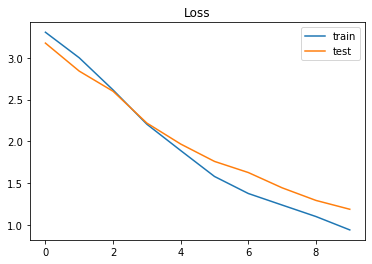

In [78]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [79]:
sector_cols = pd.get_dummies(df_selected['Sector']).columns

In [80]:
pred = model.predict(X_test)

In [81]:
pred.shape

(125, 29)

In [82]:
len(pred[0])

29

In [83]:
pred[0]

array([0.0397183 , 0.01456119, 0.01745995, 0.00589895, 0.03614971,
       0.00928229, 0.00806638, 0.00521061, 0.00449585, 0.02441215,
       0.01443447, 0.02064014, 0.0647622 , 0.01521999, 0.03953148,
       0.00593144, 0.0101168 , 0.06303304, 0.02558983, 0.02688986,
       0.00206601, 0.0255943 , 0.00794278, 0.01103323, 0.43490046,
       0.03675148, 0.00725221, 0.00619759, 0.01685724], dtype=float32)

In [84]:
heapq.nlargest(3, range(len(pred[0])), key=pred[0].__getitem__)

[24, 12, 17]

In [85]:
X_test_texts = tokenizer.sequences_to_texts(X_test)

In [86]:
closest_1_sf_sector = []
closest_2_sf_sector = []
closest_3_sf_sector = []
actual_sf_sector = []
for i in range(0, len(pred)):
    ind1, ind2, ind3 = heapq.nlargest(3, range(len(pred[i])), key=pred[i].__getitem__)
    
    closest_1_sf_sector.append(sector_cols[ind1])
    closest_2_sf_sector.append(sector_cols[ind2])
    closest_3_sf_sector.append(sector_cols[ind3])
    
    actual_sf_sector.append(sector_cols[np.argmax(Y_test[i])])

In [87]:
df = {'SF Skill Descriptions': X_test_texts, 'Actual SF Job Roles':actual_sf_sector, 'Closest 1 Predicted SF Job Roles':closest_1_sf_sector, 'Closest 2 Predicted SF Job Roles':closest_2_sf_sector, 'Closest 3 Predicted SF Job Roles':closest_3_sf_sector}

In [88]:
SF_test_results = pd.DataFrame(df)

In [89]:
SF_test_results.head(50)

,SF Skill Descriptions,Actual SF Job Roles,Closest 1 Predicted SF Job Roles,Closest 2 Predicted SF Job Roles,Closest 3 Predicted SF Job Roles
0,within social sector overview current practice...,Social Service,Social Service,Healthcare,Logistics
1,performance data wsh standard conditions pract...,Marine & Offshore,Energy and Power,Engineering Services,Food Manufacturing
2,issuing permits purposes procedures lockout ta...,Energy and Power,Energy and Power,Engineering Services,Air Transport
3,towage pilotage practices height controlled he...,Sea Transport,Media,Sea Transport,Wholesale Trade
4,work conditions practices communicate risks co...,Food Manufacturing,Food Manufacturing,Social Service,Human Resource
5,design specifications briefs collaborate stake...,Tourism,Tourism,Built Environment,Infocomm Technology
6,strategy develop resource management allocatio...,Infocomm Technology,Infocomm Technology,Media,Logistics
7,organisation use systems thinking tools formul...,Wholesale Trade,Sea Transport,Wholesale Trade,Air Transport
8,planted areas promote plant health growth supe...,Landscape,Sea Transport,Wholesale Trade,Energy and Power
9,processes relevant legislative regulatory requ...,Financial Services,Financial Services,Infocomm Technology,Media


In [44]:
# match_present = 0
# no_match = 0
# for i in range(0, len(SF_test_results)):
#     if (SF_test_results['Actual SF Job Roles'][i] == SF_test_results['Closest 1 Predicted SF Job Roles'][i]):
#         match_present = match_present+1
#     elif (SF_test_results['Actual SF Job Roles'][i] == SF_test_results['Closest 2 Predicted SF Job Roles'][i]):
#         match_present = match_present+1
#     elif (SF_test_results['Actual SF Job Roles'][i] == SF_test_results['Closest 3 Predicted SF Job Roles'][i]):
#         match_present = match_present+1
#     else:
#         no_match = no_match+1   

In [45]:
# match_present/len(SF_test_results)

In [90]:
a = [CF['clean_jd'][1]]

In [105]:
a

[' echol tech a team of technology architect at work about us at echol we believe technology exists to empower human capabilities we provide solutions that help companies in monitoring tracking and protecting their assets our datamining ability has been proven to help many companies transcend their business our team we do not believe in hierarchy here at echol we learn grow and support each other as a team we believe in having open channel of communication we recognise how hard everyone works at reaching our goals so let s make life easier and be there and ready to support each other so who cares who has what title its what you do with it that counts responsibilities collaborate with product management and engineering departments to understand needs and devise possible solutions build algorithms and design experiments to merge manage interrogate and extract data to supply tailored solutions to specific use cases implementation of testing pipelines from git to deployment spend time in p

In [91]:
CF.iloc[1]

Unnamed: 0                                                                         1
job_id                                              698c038b83040c2c474bc41c6ea3d0cb
Job Description                     ECHOL TECH – A Team of Technology Architect a...
Job Other Requirements                                                           NaN
Skills                             ['Artificial Intelligence', 'Big Data', 'C++',...
Industry                                                  ['Information Technology']
Job Title                                     Data Scientist and DevSecOps Developer
Job Experience Required (years)                                                    3
Job Monthly Min Sal                                                             5000
Job Monthly Max Sal                                                             7000
Post Date                                                                 15/09/2020
clean_jd                            echol tech a team of technolo

In [92]:
seq1 = tokenizer.texts_to_sequences(a)
padded1 = pad_sequences(seq1, maxlen=MAX_SEQUENCE_LENGTH)
pred_a = model.predict(padded1)

In [93]:
pred_a[0]

array([0.0372794 , 0.03054221, 0.03098329, 0.02084426, 0.04946382,
       0.01771316, 0.02284781, 0.01942838, 0.01889742, 0.05415413,
       0.02383021, 0.02137814, 0.05503274, 0.0245555 , 0.05289244,
       0.0207342 , 0.02693415, 0.07729723, 0.04154336, 0.05745593,
       0.01196121, 0.03445491, 0.0454372 , 0.02024557, 0.05872626,
       0.04347636, 0.02290852, 0.03274971, 0.02623247], dtype=float32)

In [94]:
np.argmax(pred_a[0])

17

In [95]:
sector_cols[np.argmax(pred_a[0])]

'Logistics'

In [96]:
heapq.nlargest(3, range(len(pred_a[0])), key=pred_a[0].__getitem__)

[17, 24, 19]

In [97]:
sector_cols[24]

'Social Service'

In [98]:
sector_cols[19]

'Media'

In [99]:
all_pred_cf = []
actual_cf_industry = []
for i in range(50):
    new_cf_jd = [CF['clean_jd'][i]]
    actual_cf_industry.append(CF['Industry'][i])
    seq = tokenizer.texts_to_sequences(new_cf_jd)
    padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    pred_cf = model.predict(padded)
    all_pred_cf.append(pred_cf)

In [101]:
pred_sf_sector = []
for i in range(0, len(all_pred_cf)):
    ind = np.argmax(all_pred_cf[i])
    pred_sf_sector.append(sector_cols[np.argmax(all_pred_cf[i])])

In [102]:
df_cf_pred = {'Actual CF Industry':actual_cf_industry, 'Predicted SF Sector':pred_sf_sector}

In [103]:
CF_test_results = pd.DataFrame(df_cf_pred)

In [104]:
CF_test_results

,Actual CF Industry,Predicted SF Sector
0,"['F&B', 'General Management']",Infocomm Technology
1,['Information Technology'],Logistics
2,['Education and Training'],Logistics
3,['Information Technology'],Logistics
4,"['Human Resources', 'Sales / Retail']",Logistics
5,['Manufacturing'],Logistics
6,['Information Technology'],Logistics
7,['Customer Service'],Infocomm Technology
8,"['F&B', 'General Management']",Accountancy
9,['Information Technology'],Logistics


# SGD classifier and Random forest

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [17]:
jobs = df_selected['Job Role'].unique()
train, test = train_test_split(df_selected, random_state=42, test_size=0.33, shuffle=True)
X_train = train['Skill description']
y_train = train['Job Role']
X_test = test['Skill description']
y_test = train['Job Role']
print(X_train.shape)
print(X_test.shape)

(21189,)
(10437,)


In [21]:
X_train

3947     identify quality control qc procedures assist ...
36383    identify underlying trends patterns business d...
25309    apply evaluated technologies organisations ope...
4269     identify workplace safety health wsh policy pr...
29807    prepare work environment equipment personal pr...
                               ...                        
39367    compute working capital management cyclerole o...
5390     analyse work practices within scope work innov...
860      operate aircraft land within runway environmen...
24404    identify workplace safety health wsh policies ...
33219    support implementation social service programs...
Name: Skill description, Length: 21189, dtype: object

In [67]:
y_train

3947                                      QA Engineer
36383                                IT Audit Manager
25309                   Project Coordination Engineer
4269                               Senior QA Engineer
29807            Patient Service Assistant Supervisor
                             ...                     
39367            Business Controller/Finance Director
5390            Quality Assurance and Control Manager
860                                     First Officer
24404    Town Gas Plant Maintenance Technical Officer
33219                                   Social Worker
Name: Job Role, Length: 21189, dtype: object

In [68]:
train['QA Engineer']

3947     1
36383    0
25309    0
4269     0
29807    0
        ..
39367    0
5390     0
860      0
24404    0
33219    0
Name: QA Engineer, Length: 21189, dtype: uint8

In [32]:
(test['Technical Officer']==1).sum()

10

In [19]:
# Define a pipeline combining a text feature extractor with multi label classifier
NB_pipeline = Pipeline([
                #('vect', CountVectorizer(lowercase=False)),
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
for i in range(0, len(jobs)):
    print(i)
    print('... Processing {}'.format(jobs[i]))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[jobs[i]]) #each time fit model with diff job 
    #does 1424 individual classifications taking y_train as each job role each time
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test) #predict for all test rows and job i
    print('Test accuracy is {}'.format(accuracy_score(test[jobs[i]], prediction)))
    
#20mins for 100 job roles, 4-5hrs for 1424 job roles

0
... Processing Airport Emergency Assistant Manager
Test accuracy is 0.9995209351346173
1
... Processing Airport Emergency Manager
Test accuracy is 0.9994251221615407
2
... Processing Airport Emergency Officer
Test accuracy is 0.9995209351346173
3
... Processing Airport Emergency Officer (Specialist)
Test accuracy is 0.9995209351346173
4
... Processing Airport Operations Centre Manager
Test accuracy is 0.9994251221615407
5
... Processing Airside Duty Manager
Test accuracy is 0.9993293091884641
6
... Processing Airside Officer
Test accuracy is 0.9993293091884641
7
... Processing Assistant Manager (Network Planning)
Test accuracy is 0.9995209351346173
8
... Processing Assistant Manager (Operations & Maintenance/Specialised Systems/Projects)
Test accuracy is 0.9997125610807703
9
... Processing Associate (Operations & Maintenance/Specialised Systems/Projects)
Test accuracy is 0.9996167481076937
10
... Processing Baggage Services Assistant
Test accuracy is 0.9995209351346173
11
... Process

Test accuracy is 0.9995209351346173
93
... Processing Engineering and Maintenance Director
Test accuracy is 0.9996167481076937
94
... Processing Engineering and Maintenance Engineer
Test accuracy is 0.998275366484622
95
... Processing Engineering and Maintenance Manager
Test accuracy is 0.9981795535115454
96
... Processing Engineering and Maintenance Principal/Senior Engineer
Test accuracy is 0.9992334962153876
97
... Processing Engineering and Maintenance Senior Technician
Test accuracy is 0.9993293091884641
98
... Processing Engineering and Maintenance Supervisor
Test accuracy is 0.9994251221615407
99
... Processing Engineering and Maintenance Technician
Test accuracy is 0.9987544313500047
100
... Processing Process Development/MS&T Director
Test accuracy is 0.999137683242311
101
... Processing Process Development/MS&T Engineer
Test accuracy is 0.9992334962153876
102
... Processing Process Development/MS&T Manager
Test accuracy is 0.9988502443230813
103
... Processing Process Develop

Test accuracy is 0.9995209351346173
193
... Processing Supply Chain/Commercial Manager
Test accuracy is 0.9999041870269234
194
... Processing Technical Service Engineer
Test accuracy is 0.9994251221615407
195
... Processing Technical Service Manager
Test accuracy is 0.9990418702692344
196
... Processing Cleaning Operations Executive
Test accuracy is 0.999137683242311
197
... Processing Cleaning Operations Manager
Test accuracy is 0.9990418702692344
198
... Processing Cleaning Supervisor
Test accuracy is 0.9993293091884641
199
... Processing Environment, Health and Safety Manager
Test accuracy is 0.9998083740538469
200
... Processing Environment, Health and Safety Specialist
Test accuracy is 0.9995209351346173
201
... Processing General Cleaner
Test accuracy is 0.9996167481076937
202
... Processing Waste and Recyclables Collection Executive
Test accuracy is 0.9990418702692344
203
... Processing Mechanical / Truck Driver
Test accuracy is 0.9997125610807703
204
... Processing Multi-Skille

Test accuracy is 0.9997125610807703
276
... Processing Freight Officer
Test accuracy is 0.9995209351346173
277
... Processing Health, Safety and Environmental Coordinator
Test accuracy is 0.9998083740538469
278
... Processing Health, Safety and Environmental Manager
Test accuracy is 0.9997125610807703
279
... Processing Health, Safety and Environmental Officer
Test accuracy is 0.9997125610807703
280
... Processing Import Export Administrative Assistant/Shipping Assistant
Test accuracy is 0.9996167481076937
281
... Processing Import Export Manager/Freight Allocation Manager/Freight Shipping Manager/Freight Documentation Manager/Freight Pricing Manager
Test accuracy is 0.9995209351346173
282
... Processing Incoming Quality Coordinator/Tally Assistant
Test accuracy is 1.0
283
... Processing IT Business Solutions Manager/Digital Services Manager
Test accuracy is 0.9995209351346173
284
... Processing IT Business Solutions Project Specialist/Digital Services Project Specialist
Test accuracy 

Test accuracy is 0.9995209351346173
354
... Processing Chief Engineer/ Senior Engineering Manager - Automatic Fare Collection
Test accuracy is 0.9995209351346173
355
... Processing Chief Engineer/ Senior Engineering Manager - Engineering Train
Test accuracy is 0.9992334962153876
356
... Processing Chief Engineer/ Senior Engineering Manager - Permanent Way and Civil Structures
Test accuracy is 0.9989460572961579
357
... Processing Chief Engineer/ Senior Engineering Manager - Power
Test accuracy is 0.9992334962153876
358
... Processing Chief Engineer/ Senior Engineering Manager - Signal and Communications
Test accuracy is 0.999137683242311
359
... Processing Communication Controller
Test accuracy is 0.9998083740538469
360
... Processing Crew Manager
Test accuracy is 0.9997125610807703
361
... Processing Customer Service Officer/ Rover
Test accuracy is 0.9990418702692344
362
... Processing Depot Operations Manager/ Depot Manager
Test accuracy is 0.9992334962153876
363
... Processing Depot

Test accuracy is 0.9989460572961579
434
... Processing Area Manager/District Manager
Test accuracy is 0.9980837405384689
435
... Processing Brand Associate/Assistant
Test accuracy is 0.9983711794576986
436
... Processing Sales Associate/Brand Associate
Test accuracy is 0.999137683242311
437
... Processing Merchandising Associate/Assistant
Test accuracy is 0.9990418702692344
438
... Processing Brand Executive/Customer Loyalty Executive
Test accuracy is 0.9987544313500047
439
... Processing Brand Director
Test accuracy is 0.9980837405384689
440
... Processing E-Commerce Associate/Assistant
Test accuracy is 0.9979879275653923
441
... Processing Marketing Executive
Test accuracy is 0.9953051643192489
442
... Processing E-Commerce Executive
Test accuracy is 0.9973172367538564
443
... Processing Brand Manager/Customer Loyalty Manager
Test accuracy is 0.9983711794576986
444
... Processing Merchandising Executive/Category Executive/House Brand Executive
Test accuracy is 0.9985628054038517
445


Test accuracy is 0.9996167481076937
527
... Processing Travel Account Director
Test accuracy is 0.999137683242311
528
... Processing Travel Account Executive
Test accuracy is 0.9997125610807703
529
... Processing Travel Account Manager
Test accuracy is 0.9989460572961579
530
... Processing Travel Operations Director
Test accuracy is 0.9992334962153876
531
... Processing Travel Operations Manager
Test accuracy is 0.9985628054038517
532
... Processing Venue Operations Director
Test accuracy is 0.9994251221615407
533
... Processing Venue Operations Executive
Test accuracy is 0.9996167481076937
534
... Processing Venue Operations Manager
Test accuracy is 0.9990418702692344
535
... Processing Design Coach/Design Accelerator
Test accuracy is 0.9996167481076937
536
... Processing Design Facilitator
Test accuracy is 0.999137683242311
537
... Processing Design Production Manager
Test accuracy is 0.999137683242311
538
... Processing Design Project Manager
Test accuracy is 0.9995209351346173
539


Test accuracy is 0.9993293091884641
615
... Processing Gas Transmission and Distribution Department Manager
Test accuracy is 0.998275366484622
616
... Processing LNG Research Analyst
Test accuracy is 0.9993293091884641
617
... Processing LNG Trading and Research Head
Test accuracy is 0.9996167481076937
618
... Processing LNG Trading Trader
Test accuracy is 0.9995209351346173
619
... Processing Engineering and Maintenance Department Manager
Test accuracy is 0.9993293091884641
620
... Processing Engineering and Maintenance Principal Engineer
Test accuracy is 0.9990418702692344
621
... Processing Engineering and Maintenance Senior Technical Officer
Test accuracy is 0.9986586183769283
622
... Processing Engineering and Maintenance Technical Officer
Test accuracy is 0.9995209351346173
623
... Processing Multi-Utility Operations and Water Quality Control Department Manager
Test accuracy is 0.9990418702692344
624
... Processing Multi-Utility Operations Engineer
Test accuracy is 0.999616748107

Test accuracy is 0.9998083740538469
699
... Processing Data Analyst
Test accuracy is 0.9997125610807703
700
... Processing Data Engineer
Test accuracy is 0.9993293091884641
701
... Processing Data Scientist
Test accuracy is 1.0
702
... Processing Digital Transformation Executive
Test accuracy is 0.9994251221615407
703
... Processing Digital Transformation Manager
Test accuracy is 0.9993293091884641
704
... Processing Head of Customer Experience/Head of User Experience
Test accuracy is 0.9997125610807703
705
... Processing Head of Data Analytics
Test accuracy is 0.9998083740538469
706
... Processing Head of Digital Transformation
Test accuracy is 0.9992334962153876
707
... Processing Head of Innovation and Process Excellence
Test accuracy is 0.9995209351346173
708
... Processing Innovation and Process Excellence Manager
Test accuracy is 0.9995209351346173
709
... Processing Innovation Executive
Test accuracy is 0.9998083740538469
710
... Processing Account Operations Analyst
Test accura

Test accuracy is 0.9996167481076937
794
... Processing Assistant Relationship Manager - Private Banking
Test accuracy is 0.9995209351346173
795
... Processing Assistant Relationship Manager - Retail Banking/Personal Banking Executive
Test accuracy is 0.999137683242311
796
... Processing Assistant Relationship Manager/Relationship Associate
Test accuracy is 0.9997125610807703
797
... Processing Branch Manager
Test accuracy is 0.9994251221615407
798
... Processing Broker/Business Development Executive - Brokers
Test accuracy is 0.9997125610807703
799
... Processing Business Development Executive/Distribution Executive/Channel Executive/Partnerships and Affinity Management Executive
Test accuracy is 0.9997125610807703
800
... Processing Business Development Manager - Brokers
Test accuracy is 0.9994251221615407
801
... Processing Business Development Manager/Distribution Manager/Channel Manager/Partnerships and Affinity Management Manager
Test accuracy is 0.9994251221615407
802
... Process

Test accuracy is 0.9995209351346173
880
... Processing Senior Occupational Therapist
Test accuracy is 0.9979879275653923
881
... Processing Senior Principal Occupational Therapist (Clinical)
Test accuracy is 0.999137683242311
882
... Processing Senior Principal Occupational Therapy Educator
Test accuracy is 0.9995209351346173
883
... Processing Senior Principal Occupational Therapy Manager
Test accuracy is 0.9992334962153876
884
... Processing Senior Principal Occupational Therapy Researcher
Test accuracy is 0.9997125610807703
885
... Processing Patient Service Assistant Supervisor
Test accuracy is 0.9992334962153876
886
... Processing Patient Service Associate
Test accuracy is 0.9997125610807703
887
... Processing Patient Service Executive
Test accuracy is 0.9997125610807703
888
... Processing Patient Service Senior Associate
Test accuracy is 0.9995209351346173
889
... Processing Patient Service Supervisor
Test accuracy is 0.9997125610807703
890
... Processing Pharmacy Technician
Test

Test accuracy is 0.9998083740538469
970
... Processing Reporter/Correspondent - News
Test accuracy is 0.9997125610807703
971
... Processing Scriptwriter/Writer
Test accuracy is 0.9997125610807703
972
... Processing Senior Anchor/Senior Presenter/Anchor/Presenter - News
Test accuracy is 0.9999041870269234
973
... Processing Senior Producer/Producer - Current Affairs
Test accuracy is 0.9998083740538469
974
... Processing Senior Producer/Producer - News
Test accuracy is 0.9999041870269234
975
... Processing Senior Reporter/Senior Correspondent - News* (Visual Journalism)
Test accuracy is 0.9996167481076937
976
... Processing Game Director
Test accuracy is 0.9997125610807703
977
... Processing Junior Designer
Test accuracy is 1.0
978
... Processing Lead Game Designer
Test accuracy is 0.9999041870269234
979
... Processing Senior Game Designer
Test accuracy is 0.9998083740538469
980
... Processing Senior Level Designer
Test accuracy is 0.9996167481076937
981
... Processing Assistant Producer

Test accuracy is 0.9995209351346173
1062
... Processing Volunteer Manager
Test accuracy is 0.9998083740538469
1063
... Processing Beginning Early Intervention Teacher
Test accuracy is 0.9994251221615407
1064
... Processing Centre Manager
Test accuracy is 1.0
1065
... Processing Director
Test accuracy is 0.9980837405384689
1066
... Processing Early Intervention Teacher
Test accuracy is 0.9993293091884641
1067
... Processing Lead Early Intervention Teacher
Test accuracy is 0.9994251221615407
1068
... Processing Senior Early Intervention Teacher
Test accuracy is 0.9994251221615407
1069
... Processing Senior Lead Early Intervention Teacher
Test accuracy is 0.9989460572961579
1070
... Processing Teacher Aide
Test accuracy is 0.9996167481076937
1071
... Processing Assistant Director/Senior Manager
Test accuracy is 0.9995209351346173
1072
... Processing Associate Psychologist
Test accuracy is 0.9992334962153876
1073
... Processing Chief Psychologist
Test accuracy is 0.9996167481076937
1074
..

Test accuracy is 0.9997125610807703
1159
... Processing Occupational Hygiene Officer
Test accuracy is 0.999137683242311
1160
... Processing Occupational Hygienist
Test accuracy is 0.9990418702692344
1161
... Processing Workplace Safety and Health Supervisor
Test accuracy is 0.9996167481076937
1162
... Processing Lead Workplace Safety and Health Auditor
Test accuracy is 0.9997125610807703
1163
... Processing Workplace Safety and Health Auditor
Test accuracy is 0.9996167481076937
1164
... Processing Artificial Intelligence Applied Researcher
Test accuracy is 0.9996167481076937
1165
... Processing Artificial Intelligence/Machine Learning Engineer
Test accuracy is 0.9995209351346173
1166
... Processing Applications Support Engineer
Test accuracy is 0.9998083740538469
1167
... Processing Associate Applications Support Engineer
Test accuracy is 0.9996167481076937
1168
... Processing Associate Business Analyst
Test accuracy is 0.9998083740538469
1169
... Processing Associate Data Centre Opera

/Users/eramalam/anaconda3/lib/python3.7/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


Test accuracy is 0.9999041870269234
1181
... Processing Associate UI Designer
Test accuracy is 0.9997125610807703
1182
... Processing Associate UX Designer
Test accuracy is 0.9993293091884641
1183
... Processing Automation and Orchestration Engineer
Test accuracy is 0.9990418702692344
1184
... Processing Business Intelligence Director
Test accuracy is 0.9992334962153876
1185
... Processing Business Intelligence Manager
Test accuracy is 0.9995209351346173
1186
... Processing Business Analyst/Artificial Intelligence Translator
Test accuracy is 0.9988502443230813
1187
... Processing Business Architect
Test accuracy is 0.9988502443230813
1188
... Processing Chief Data Officer/Chief Artificial Intelligence Officer
Test accuracy is 0.9994251221615407
1189
... Processing Channel Sales Manager
Test accuracy is 0.9996167481076937
1190
... Processing Chief Information Officer
Test accuracy is 0.9995209351346173
1191
... Processing Chief Technology Officer
Test accuracy is 0.9992334962153876
1192

Test accuracy is 0.9997125610807703
1280
... Processing Principal Marine Surveyor
Test accuracy is 0.9995209351346173
1281
... Processing Desk Head (Sales and Purchase)
Test accuracy is 0.9997125610807703
1282
... Processing Head of Network Planning
Test accuracy is 0.9993293091884641
1283
... Processing Network Planning Manager
Test accuracy is 0.999137683242311
1284
... Processing Network Planner
Test accuracy is 0.9995209351346173
1285
... Processing Plan Approval Engineer
Test accuracy is 0.9996167481076937
1286
... Processing Lead Plan Approval Engineer
Test accuracy is 0.9996167481076937
1287
... Processing Senior Plan Approval Engineer
Test accuracy is 0.9994251221615407
1288
... Processing Head of Port Business Development/Operations
Test accuracy is 0.9993293091884641
1289
... Processing Port Business Development/Operations Manager
Test accuracy is 0.9993293091884641
1290
... Processing Operations Executive/Operations Supervisor
Test accuracy is 0.9992334962153876
1291
... Pro

Test accuracy is 0.9997125610807703
1371
... Processing Financial Forensics Director/Financial Forensics Partner
Test accuracy is 0.9989460572961579
1372
... Processing Chief Risk Officer/Risk Partner/Head of Risk/Enterprise Risk Management Director
Test accuracy is 0.9997125610807703
1373
... Processing Mergers and Acquisitions Partner/Mergers and Acquisitions Director
Test accuracy is 0.9994251221615407
1374
... Processing Restructuring and Insolvency Partner/Restructuring and Insolvency Director
Test accuracy is 0.9993293091884641
1375
... Processing Tax Partner/Tax Director/Tax Vice President/Head of Tax
Test accuracy is 0.9997125610807703
1376
... Processing Financial Controller
Test accuracy is 0.9986586183769283
1377
... Processing Chief Financial Officer
Test accuracy is 0.9993293091884641
1378
... Processing Director/Managing Director/Chief Executive/General Manager
Test accuracy is 0.9995209351346173
1379
... Processing Architectural Assistant
Test accuracy is 0.9997125610807

In [28]:
len(prediction)

10437

In [35]:
(prediction==1).sum()

0

In [33]:
sum(prediction)

0

In [38]:
# Define a pipeline combining a text feature extractor with multi label classifier
RF_pipeline = Pipeline([
                #('vect', CountVectorizer(lowercase=False)),
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', RandomForestClassifier(max_depth=2, random_state=0)),
            ])
predictions = []
for i in range(0, len(jobs)):
    print(i)
    print('... Processing {}'.format(jobs[i]))
    # train the model using X_dtm & y
    RF_pipeline.fit(X_train, train[jobs[i]]) #each time fit model with diff job 
    #does 1424 individual classifications taking y_train as each job role each time
    # compute the testing accuracy
    pred = RF_pipeline.predict(X_test) #predict for all test rows and job i
    predictions.append(pred)
    print('Test accuracy is {}'.format(accuracy_score(test[jobs[i]], pred)))
    
#20mins for 100 job roles, 4-5hrs for 1424 job roles

0
... Processing Airport Emergency Assistant Manager
Test accuracy is 0.9995209351346173
1
... Processing Airport Emergency Manager
Test accuracy is 0.9994251221615407
2
... Processing Airport Emergency Officer
Test accuracy is 0.9995209351346173
3
... Processing Airport Emergency Officer (Specialist)
Test accuracy is 0.9995209351346173
4
... Processing Airport Operations Centre Manager
Test accuracy is 0.9994251221615407
5
... Processing Airside Duty Manager
Test accuracy is 0.9993293091884641
6
... Processing Airside Officer
Test accuracy is 0.9993293091884641
7
... Processing Assistant Manager (Network Planning)


KeyboardInterrupt: 

In [39]:
predictions

[array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)]

In [41]:
predictions[0].sum()

0

In [42]:
predictions[1].sum()

0

In [43]:
predictions[2].sum()

0

In [44]:
predictions[3].sum()

0

In [68]:
X = df_selected[['Skill description']]
y = df_selected[['Job Role']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [102]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([#('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [2, 22138]

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=ind))
RandomForestClassifier()

In [62]:
CF['Industry_cleaned'] = CF['Industry'].apply(lambda x : eval(x))

In [79]:
selection = ['Design']
selected = CF.Industry_cleaned.apply(lambda x: any(item for item in selection if item in x))
CF_selected = CF[selected]

In [81]:
CF_selected.reset_index(inplace=True)

In [82]:
CF_selected

,index,Unnamed: 0,job_id,Job Description,Job Other Requirements,Skills,Industry,Job Title,Job Experience Required (years),Job Monthly Min Sal,Job Monthly Max Sal,Post Date,Industry_cleaned
0,23,23,32d0f6fbe3fc7950757c304ecfc4c3d6,Responsibilities \n \n Facilitate creative vi...,NaN,"['Brand Positioning Strategies', 'Campaign Str...","['Design', 'Sales / Retail']",Visual Merchandiser Coordinator (1 year contract),2,2500,2800,15/09/2020,"[Design, Sales / Retail]"
1,65,65,c95582d4763e41603b782036bada875e,Job Description \n Responsibilities \n · Crea...,NaN,"['CSS', 'Graphic Design', 'Information Archite...",['Design'],UI/UX Designer,5,4000,5000,15/09/2020,[Design]
2,164,164,6e46e1f45febb3a112cb9233c69be244,We are looking for copywriters that can creat...,NaN,"['Advertising Agency', 'Advertising Management...","['Advertising / Media', 'Consulting', 'Design']",Creative Content Copywriter #SGUnitedjobs,1,2200,3000,15/09/2020,"[Advertising / Media, Consulting, Design]"
3,317,317,693fe3ba13db0d1e2ffef6c9e17b32ed,Deliver realistic and high quality visualisat...,NaN,"['3D Rendering', 'Adobe Creative Suite', 'Adob...","['Design', 'Others']",Senior Visualiser,6,6000,8000,15/09/2020,"[Design, Others]"
4,333,333,eaa8c9af7b9b4ccef38bc2b0dcb38677,The Digital Historical Maps of Southeast Asia...,NaN,"['Cartography', 'Collaboration', 'Oral & Writt...",['Design'],Concept/UX Designer (1-year Contract),0,4000,5000,15/09/2020,[Design]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,38925,38925,0c23b35a5fe75aca9f69cc44efd23f19,Traineeship Description \n This position repo...,NaN,"['Analytics', 'Artificial Intelligence', 'Clou...","['Design', 'Engineering', 'Information Technol...",Data Analytic Trainee #SGUnitedTraineeships #SGUP,0,2500,2500,16/08/2020,"[Design, Engineering, Information Technology, ..."
1048,38946,38946,77a05174ffb32be9ba546b54dc96d8be,This position reports to the Digital cum Marc...,NaN,"['Community Management', 'Copywriting', 'Digit...","['Advertising / Media', 'Design', 'Events / Pr...",Social Media and Digital Executive #SGUnitedTr...,0,2000,2000,16/08/2020,"[Advertising / Media, Design, Events / Promoti..."
1049,38993,38993,9eca7f806ec63efb184d48a59112e094,Responsible and willing to work as a Team \n ...,NaN,"['Chair Massage', 'Fast Learner', 'Friendly Pe...",['Design'],MASTER HAIR STYLIST,10,2400,3800,16/08/2020,[Design]
1050,39003,39003,3e827130bbba4798ebda0f3bd84e2562,Traineeship Description \n VFlowTech Pte Ltd ...,NaN,"['Advertising', 'Business Development', 'Manag...","['Design', 'Engineering', 'General Management'...",Business Development Assistant#SGUnitedTrainee...,0,2500,3500,16/08/2020,"[Design, Engineering, General Management, Mark..."


In [65]:
new_jd = CF['Job Description'][1]
seq = tokenizer.texts_to_sequences(new_jd)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
# labels = SFW['Job Role'].unique()
# print(pred, labels[np.argmax(pred)])

In [67]:
np.argmax(pred)

1366452

# NEW

In [7]:
sfw_new = pd.read_csv('sf_model_final.csv')

In [8]:
sfw_new

,Unnamed: 0,Job Role,Sector,Skill Title,Skill description,Skill Description,Job_Role_Replaced
0,0,Airport Emergency Assistant Manager,Air Transport,Accident and Incident Response Management,follow instructions processes accidents incide...,"follow,instructions,processes,accidents_incide...",airport emerg assist
1,1,Airport Emergency Assistant Manager,Air Transport,Airport Operations Management,identify different functions duties airport op...,"identify,different,functions,duties,airport,op...",airport emerg assist
2,2,Airport Emergency Assistant Manager,Air Transport,Airside Driving,operate vehicles transport materials equipment...,"operate,vehicles,transport,materials,equipment...",airport emerg assist
3,3,Airport Emergency Assistant Manager,Air Transport,Business Negotiation,sustain business relationships engagement stak...,"sustain,business,relationships,engagement,stak...",airport emerg assist
4,4,Airport Emergency Assistant Manager,Air Transport,Change Management,execute change accordance new policies standar...,"execute,change,accordance,new,policies,standar...",airport emerg assist
...,...,...,...,...,...,...,...
31621,31621,Technical Officer,Built Environment,Technical Writing,draft technical reports according established ...,"draft,technical,reports,according,established,...",technic offic
31622,31622,Technical Officer,Built Environment,Technology Application,adopt new technologies enhance operations proc...,"adopt,new,technologies,enhance,operations,proc...",technic offic
31623,31623,Technical Officer,Built Environment,Value Engineering,apply developed processes procedures minimise ...,"apply,developed,processes,procedures,minimise,...",technic offic
31624,31624,Technical Officer,Built Environment,Workplace Safety and Health Culture Development,support workplace safety health wsh culture pr...,"support,workplace,safety,health,wsh,culture,pr...",technic offic


In [9]:
sfw_new.isna().sum()

Unnamed: 0            0
Job Role              0
Sector                0
Skill Title           0
Skill description     0
Skill Description     0
Job_Role_Replaced    69
dtype: int64

In [10]:
sfw_new.dropna(inplace=True)

In [56]:
df_selected = sfw_new[sfw_new['Sector'] == "Infocomm Technology"]

In [61]:
df_selected_new = df_selected[['Skill description', 'Sector', 'Job_Role_Replaced']]

In [62]:
df_selected_new

,Skill description,Sector,Job_Role_Replaced
25565,explore opportunities business innovation refo...,Infocomm Technology,artifici intellig appli research
25566,document business requirements identify basic ...,Infocomm Technology,artifici intellig appli research
25567,setup deploy video analytics algorithms perfor...,Infocomm Technology,artifici intellig appli research
25568,identify data requirements support design data...,Infocomm Technology,artifici intellig appli research
25569,apply uphold principles professional legal eth...,Infocomm Technology,artifici intellig appli research
...,...,...,...
30059,analyse strategies critical business functions...,Infocomm Technology,oper and support
30060,develop resource allocation plans implement st...,Infocomm Technology,oper and support
30061,assess organisations utilisation energy supply...,Infocomm Technology,oper and support
30062,perform basic compatibility assessments integr...,Infocomm Technology,oper and support


In [63]:
len(df_selected_new['Job_Role_Replaced'].unique())

87

In [64]:
df_selected_new['Job_Role_Replaced'].unique()

array(['artifici intellig appli research',
       'artifici intelligence/machin learn engin', 'applic support engin',
       'associ applic support engin', 'associ busi analyst',
       'associ data centr oper engin', 'associ databas support engin',
       'associ embed system engin', 'associ infrastructur engin',
       'associ infrastructur support engin', 'associ network engin',
       'associ oper centr support engin', 'associ radio frequenc engin',
       'associ secur analyst', 'associ softwar engin',
       'system support engin', 'associ system support engin',
       'associ ui design', 'associ ux design', 'autom and orchestr engin',
       'busi intellig', 'busi analyst/artifici intellig translat',
       'busi architect', 'busi develop',
       'chief data officer/chief artifici intellig offic', 'channel sale',
       'chief inform offic', 'chief technolog offic',
       'chief inform secur offic', 'custom success', 'cyber risk analyst',
       'cyber risk', 'data scientist/a

In [65]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_selected_new['Skill description'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 4005 unique tokens.


In [66]:
X = tokenizer.texts_to_sequences(df_selected_new['Skill description'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (2323, 250)


In [67]:
Y = pd.get_dummies(df_selected_new['Job_Role_Replaced']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (2323, 87)


In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2090, 250) (2090, 87)
(233, 250) (233, 87)


In [84]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(87, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_4 (Dense)              (None, 87)                8787      
Total params: 5,089,187
Trainable params: 5,089,187
Non-trainable params: 0
_________________________________________________________________
None


In [85]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
30/30 [==============================] - 18s 493ms/step - loss: 4.4564 - accuracy: 0.0273 - val_loss: 4.3518 - val_accuracy: 0.0431
Epoch 2/5
30/30 [==============================] - 11s 361ms/step - loss: 4.3426 - accuracy: 0.0486 - val_loss: 4.3450 - val_accuracy: 0.0431
Epoch 3/5
30/30 [==============================] - 11s 379ms/step - loss: 4.3017 - accuracy: 0.0467 - val_loss: 4.3149 - val_accuracy: 0.0431
Epoch 4/5
30/30 [==============================] - 11s 369ms/step - loss: 4.2857 - accuracy: 0.0481 - val_loss: 4.3039 - val_accuracy: 0.0383
Epoch 5/5
30/30 [==============================] - 11s 368ms/step - loss: 4.2252 - accuracy: 0.0635 - val_loss: 4.2507 - val_accuracy: 0.0526


In [86]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

8/8 [==============================] - 0s 51ms/step - loss: 4.2756 - accuracy: 0.0687
Test set
  Loss: 4.276
  Accuracy: 0.069


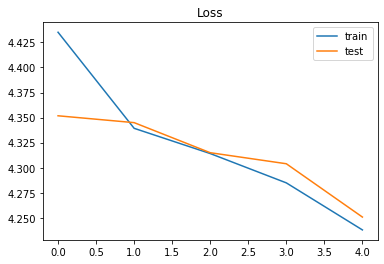

In [87]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [73]:
jobs = pd.get_dummies(df_selected_new['Job_Role_Replaced']).columns

In [88]:
pred = model.predict(X_test)

In [75]:
pred.shape

(233, 87)

In [76]:
X_test_texts = tokenizer.sequences_to_texts(X_test)

In [89]:
pred_sf_job_role = []
actual_sf_job_role = []
for i in range(0, len(pred)):
    ind = np.argmax(pred[i])
    pred_sf_job_role.append(jobs[np.argmax(pred[i])])
    actual_sf_job_role.append(jobs[np.argmax(Y_test[i])])

In [90]:
df = {'SF Skill Descriptions': X_test_texts, 'Actual SF Job Roles':actual_sf_job_role, 'Predicted SF Job Roles':pred_sf_job_role}
SF_test_results = pd.DataFrame(df)

In [91]:
SF_test_results.head(30)

,SF Skill Descriptions,Actual SF Job Roles,Predicted SF Job Roles
0,analyse strategies critical business functions...,program,artifici intelligence/machin learn engin
1,perform technical product demonstrations short...,embed system engin,market
2,support development coordination partnerships ...,qualiti assur engin,market
3,draft simple test scenarios perform software t...,sale account,market
4,processes systems tools ensure efficient recov...,product,market
5,measures authentication user account controls ...,busi develop,market
6,parties systems integrate cyber datarelated in...,head of data scienc and artifici intellig,artifici intelligence/machin learn engin
7,virus protection apply basic access rights per...,head of infrastructur,softwar engin
8,resources intended purposes present financial ...,head of it audit,market
9,parties systems integrate cyber datarelated in...,forens investig,vulner assess and penetr test analyst


In [82]:
df_selected_new['Job_Role_Replaced'].value_counts()

infrastructur engin                      105
market                                    82
oper and support                          76
softwar engin                             66
embed system engin                        62
                                        ... 
data protect                              12
secur engineer/secur engin                12
vulner assess and penetr test analyst     12
secur oper analyst                        11
associ system support engin                1
Name: Job_Role_Replaced, Length: 87, dtype: int64